In [338]:
import pandas as pd
import glob
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow 
import autokeras as ak
import scipy.io

In [2]:
import tensorflow

In [815]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "../raw_data/Test/*.txt"))))

In [827]:
df

,curr_dens,Volts_tot,Temp_tot,t_tot,SOC_tot
0,-23.538367,3.963454,298.150000,0.0,82.000000
1,-23.538367,3.963147,298.151811,0.5,81.988816
2,-23.538367,3.962862,298.153755,1.0,81.977631
3,-23.538367,3.962591,298.155722,1.5,81.966447
4,-23.538367,3.962331,298.157708,2.0,81.955263
...,...,...,...,...,...
5368,-1.243947,3.759022,299.532912,2684.0,36.857142
5369,-28.188080,3.715951,299.536224,2684.5,36.843749
5370,-28.188080,3.715737,299.539873,2685.0,36.830355
5371,-28.188080,3.715534,299.543545,2685.5,36.816961


In [816]:
pd.read_csv('../raw_data/Test/results1.txt')

,curr_dens,Volts_tot,Temp_tot,t_tot,SOC_tot
0,20.042216,3.985313,298.150000,0.0,75.000000
1,20.042216,3.985557,298.149698,0.5,75.009523
2,20.042216,3.985784,298.149335,1.0,75.019046
3,20.042216,3.986000,298.148992,1.5,75.028569
4,20.042216,3.986208,298.148668,2.0,75.038092
...,...,...,...,...,...
5600,-1.177744,3.816955,299.184734,2800.0,50.479229
5601,-1.177744,3.817003,299.182497,2800.5,50.478670
5602,-1.177744,3.817049,299.180265,2801.0,50.478110
5603,-1.177744,3.817094,299.178036,2801.5,50.477551


In [817]:
X=df.drop(columns=['SOC_tot'])
y = df.SOC_tot
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=False)

In [9]:
y_test

2635    66.499233
2636    66.482135
2637    66.465036
2638    66.447938
2639    66.430839
          ...    
5368    36.857142
5369    36.843749
5370    36.830355
5371    36.816961
5372    36.803568
Name: SOC_tot, Length: 163202, dtype: float64

Coefficients: 
 [-2.70505434e-01  1.57167742e+02  2.78735704e+00 -2.09336454e-04]
Mean squared error: 35.61
Coefficient of determination: 0.90


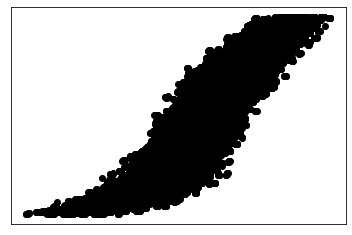

In [11]:
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test['Volts_tot'], y_test,  color='black')
#plt.plot(X_test['voltage'], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
X_test

,time,voltage,curr_density,temp
734,367.0,3.012058,-29.50,288.283766
335,167.5,3.709120,-14.75,311.891725
284,142.0,3.457124,-14.75,311.331105
140,70.0,3.701728,-14.75,265.802300
76,38.0,3.784274,-29.50,323.397874
...,...,...,...,...
48,24.0,3.635964,-29.50,278.390773
717,358.5,3.806399,-29.50,288.186784
68,34.0,3.871705,-29.50,308.301898
736,368.0,3.555800,-29.50,302.251302


In [7]:
y_test

734     2.234668
335    28.231656
284     7.589079
140    30.598304
76     51.934713
         ...    
48     21.327187
717    65.472967
68     70.046848
736    15.206656
800    26.309575
Name: SOC, Length: 29510, dtype: float64

In [12]:
import autokeras

In [13]:
# It tries 10 different models.
reg = ak.StructuredDataRegressor(max_trials=30, overwrite=True)
# Feed the structured data regressor with training data.
reg.fit(X_train, y_train, epochs=30)
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))

Trial 30 Complete [00h 04m 16s]
val_loss: 478.90435791015625

Best val_loss So Far: 0.438973993062973
Total elapsed time: 03h 20m 59s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
11901/11901 [==============================] - 12s 986us/step - loss: 1422.7758 - mean_squared_error: 1422.7758s - loss: 1668.2704 - ETA: 0s - loss: 1540.1647 - mean_squared_error: - ETA: 0s - loss: 1501.8062 - mean_sq
Epoch 2/30
11901/11901 [==============================] - 11s 961us/step - loss: 2.7639 - mean_squared_error: 2.7639s -
Epoch 3/30
11901/11901 [==============================] - 12s 1ms/step - loss: 1.5575 - mean_squared_error: 1.5575A: 12s - loss: 2.3789 - mean_squa - ETA: 10s - loss: 1. - ETA: 4s - loss: 1.3163 - mean_squared_error:  - ETA: 4s - loss: 1.5305 -  - ETA: 0s - loss: 1.6287 -  - ETA: 0s - loss: 1.5552 - mean_squared_error
Epoch 4/30
11901/11901 [==============================] - 12s 976us/step - loss: 1.5127 - mean_squared_error: 1.5127s - loss: 1.5156 - mean_squared_err
Epoch 

2021-09-28 16:06:01.916170: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets
5101/5101 [==============================] - 4s 794us/step - loss: 0.2140 - mean_squared_error: 0.2140
[0.21396014094352722, 0.21396014094352722]


In [14]:
model = reg.export_model()

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
regression_head_1 (Dense)    (None, 1)                 65        
Total params: 394
Trainable params: 385
Non-trainable params: 9
_______________________________________________________________

In [16]:
y_test[0:10]

2635    66.499233
2636    66.482135
2637    66.465036
2638    66.447938
2639    66.430839
2640    66.407558
2641    66.384277
2642    66.360997
2643    66.337716
2644    66.314435
Name: SOC_tot, dtype: float64

In [17]:
print(predicted_y[0:10])

[[66.15457 ]
 [66.108406]
 [66.064896]
 [66.02353 ]
 [65.984314]
 [65.987976]
 [65.93561 ]
 [65.886314]
 [65.83967 ]
 [65.79542 ]]


In [18]:
print(type(model))

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [19]:
model.save("model_autokeras", save_format="tf")

INFO:tensorflow:Assets written to: model_autokeras/assets


In [20]:
from tensorflow.keras.models import load_model
loaded_model = load_model("model_autokeras", custom_objects=ak.CUSTOM_OBJECTS)

In [21]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
multi_category_encoding (Mul (None, 4)                 0         
_________________________________________________________________
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
regression_head_1 (Dense)    (None, 1)                 65        
Total params: 394
Trainable params: 385
Non-trainable params: 9
_______________________________________________________________

In [22]:
predicted_y = loaded_model.predict(tf.expand_dims(X_test, -1))

<IPython.core.display.Javascript object>

In [43]:
predicted_y

array([[66.15457 ],
       [66.108406],
       [66.064896],
       ...,
       [36.33899 ],
       [36.296112],
       [36.25589 ]], dtype=float32)

In [46]:
y_test

2635    66.499233
2636    66.482135
2637    66.465036
2638    66.447938
2639    66.430839
          ...    
5368    36.857142
5369    36.843749
5370    36.830355
5371    36.816961
5372    36.803568
Name: SOC_tot, Length: 163202, dtype: float64

In [95]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

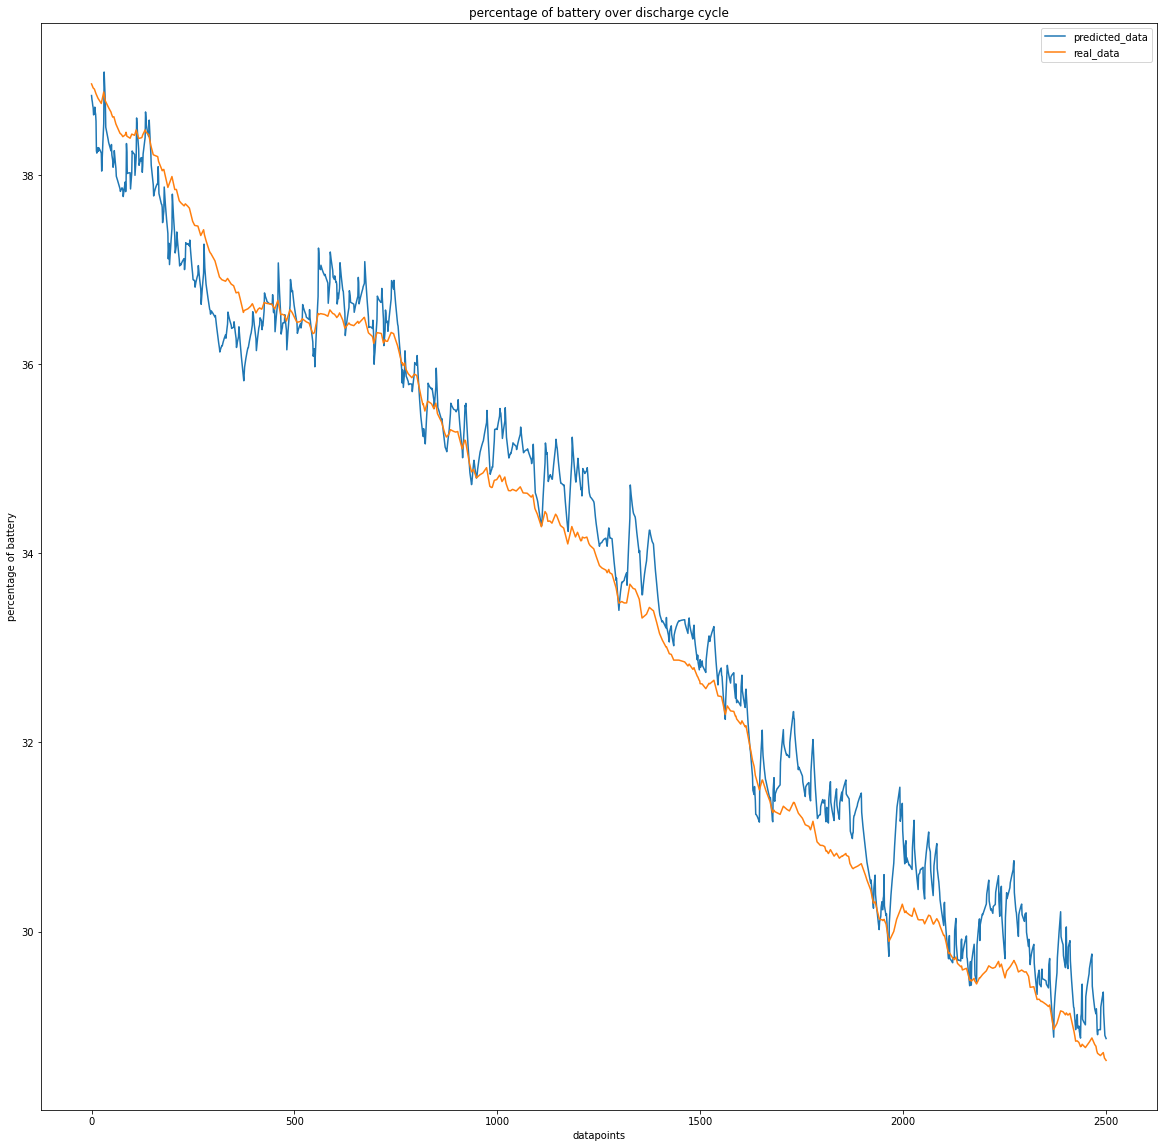

In [91]:
X = np.linspace(0,2500,2500)

plt.figure(figsize=(20,20))
plt.plot(X,predicted_y[3000:5500], label='predicted_data')
plt.plot(X,y_test[3000:5500], label='real_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

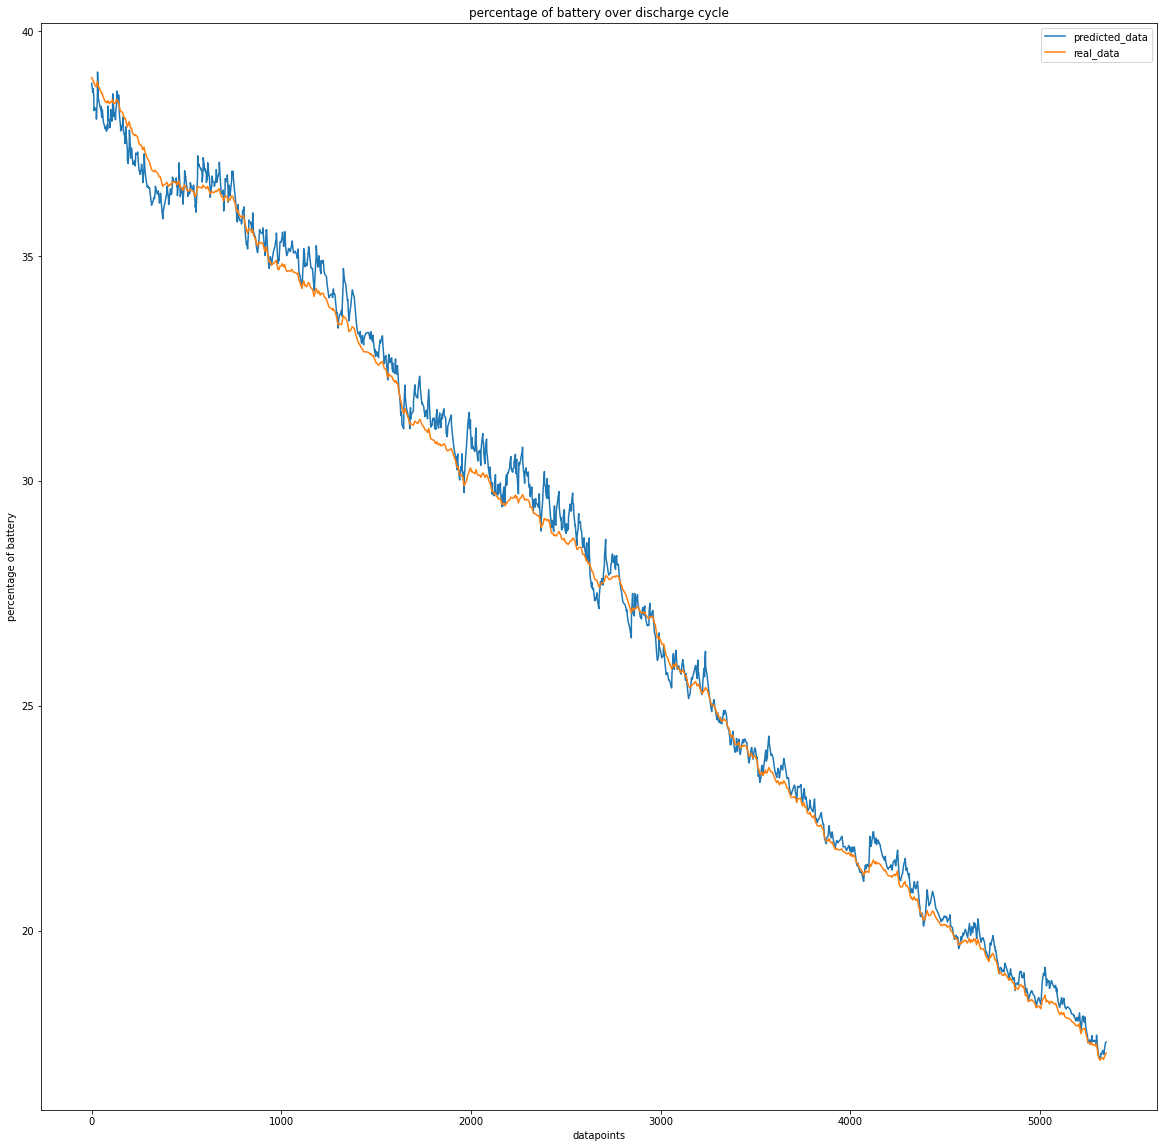

In [129]:
X = np.linspace(0,5350,5350)
plt.figure(figsize=(20,20))
plt.plot(X,predicted_y[3000:8350], label='predicted_data')
plt.plot(X,y_test[3000:8350], label='real_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

In [335]:
df

,curr_dens,Volts_tot,Temp_tot,t_tot,SOC_tot
0,-17.715577,3.728046,272.000000,0.0,34.000000
1,-17.715577,3.727801,272.003044,0.5,33.991582
2,-17.715577,3.727573,272.006279,1.0,33.983165
3,-17.715577,3.727355,272.009530,1.5,33.974747
4,-17.715577,3.727144,272.012796,2.0,33.966330
...,...,...,...,...,...
5543,8.920406,3.406472,317.898041,2771.5,3.757894
5544,23.201588,3.443712,317.888330,2772.0,3.768918
5545,23.201588,3.444352,317.878582,2772.5,3.779942
5546,23.201588,3.444985,317.868878,2773.0,3.790967


In [340]:
mat = scipy.io.loadmat('/Users/monmac/Downloads/Battery_Uniform_Distribution_Charge_Discharge_DataSet_2Post/data/Matlab/RW9.mat')

In [641]:
df=pd.DataFrame(mat['data'][0][0][0][0], columns=['comment','type','time','relativeTime','voltage','current','temperature','date'])


In [715]:
table = []
for x in range(10):
    rows = []
    for i in range(8):
        rows.append(mat['data'][0][0][0][0][x][i])
    table.append(rows)
    
df1=pd.DataFrame(table, columns=['comment','type','time','relativeTime','voltage','current','temperature','date'])
df1=df.drop(columns=['comment','type','date'])


columns = ['time','relativeTime','voltage','current','temperature']

#this will output in a dataframe the cycle number z contained in the dataset 
z=18
dict1={}
for x in columns:
    list1 = []
    for i in range(len(df1.loc[:,x][z][0])):
        list1.append(df1.loc[:,x][z][0][i])
    dict1[f'{x}']=list1
any_cycle=pd.DataFrame(dict1)

In [716]:
any_cycle

,time,relativeTime,voltage,current,temperature
0,59458.08,0.01,3.753,0,24.15113
1,59459.08,1.01,3.760,0,24.15113
2,59460.08,2.01,3.761,0,24.15113
3,59461.08,3.01,3.762,0,24.15113
4,59462.08,4.01,3.763,0,24.15113
...,...,...,...,...,...
1196,60654.08,1196.01,3.806,0,23.10516
1197,60655.08,1197.01,3.806,0,23.10516
1198,60656.08,1198.01,3.806,0,23.10516
1199,60657.08,1199.01,3.806,0,23.10516


In [678]:
df1

,time,relativeTime,voltage,current,temperature
0,"[[5.04, 15.04, 25.04, 35.04, 45.04, 55.04, 65....","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[3.838, 3.865, 3.878, 3.888, 3.895, 3.9, 3.90...","[[-2.007, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, ...","[[24.3853, 24.3853, 24.29163, 24.2448, 24.2604..."
1,"[[10509.699999999999, 10519.7, 10529.7, 10539....","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.113, 4.099, 4.091, 4.085, 4.079, 4.075, 4....","[[1.004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[22.10602, 22.05919, 22.04357, 22.01235, 21.9..."
2,"[[18062.29, 18072.29, 18082.29, 18092.29, 1810...","[[0.03, 10.03, 20.03, 30.03, 40.03, 50.03, 60....","[[3.492, 3.601, 3.651, 3.69, 3.723, 3.751, 3.7...","[[-2.01, -2.0, -2.0, -2.0, -2.001, -2.0, -2.0,...","[[27.49199, 27.5076, 27.5076, 27.47638, 27.445..."
3,"[[28575.879999999997, 28585.88, 28595.88, 2860...","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.113, 4.099, 4.091, 4.085, 4.079, 4.074, 4....","[[1.003, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[22.55875, 22.55875, 22.57436, 22.60559, 22.6..."
4,"[[46858.079999999994, 46859.079999999994, 4686...","[[0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7....","[[4.199, 4.199, 4.199, 4.199, 4.199, 4.199, 4....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[22.99587, 22.98026, 22.98026, 22.98026, 22.9..."
...,...,...,...,...,...
113573,"[[12675446.09, 12675456.09, 12675466.09, 12675...","[[0.01, 10.01, 20.01, 30.01, 40.01, 50.01, 60....","[[3.328, 3.482, 3.522, 3.551, 3.573, 3.59, 3.6...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[38.29132, 38.27586, 38.24494, 38.22948, 38.2..."
113574,"[[12682646.12, 12682656.120000001, 12682666.12...","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.096, 4.181, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, ...","[[-2.0, -2.0, -1.938, -1.794, -1.68, -1.588, -...","[[32.10779, 32.13871, 32.18508, 32.24692, 32.3..."
113575,"[[12703178.8, 12703188.8, 12703198.8, 12703208...","[[0.01, 10.01, 20.01, 30.01, 40.01, 50.01, 60....","[[4.198, 4.198, 4.197, 4.197, 4.197, 4.197, 4....","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[32.40151, 32.40151, 32.40151, 32.40151, 32.4..."
113576,"[[12703478.83, 12703488.83, 12703498.83, 12703...","[[0.04, 10.04, 20.04, 30.04, 40.04, 50.04, 60....","[[4.055, 3.995, 3.976, 3.961, 3.948, 3.937, 3....","[[1.005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1....","[[32.46334, 32.49426, 32.52518, 32.5561, 32.60..."


In [746]:
mat = scipy.io.loadmat('/Users/monmac/Downloads/Automotive Li-ion Cell Usage Data Set/TrainingSet.mat')

In [747]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Sep  7 18:57:47 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Cn': array([[15]], dtype=uint8),
 'Iin': array([[ 0.00904],
        [ 0.00904],
        [-0.00904],
        ...,
        [ 0.     ],
        [ 0.     ],
        [ 0.     ]]),
 'Q_Ah': array([[ 0.00000000e+00],
        [ 0.00000000e+00],
        [-2.64553419e-06],
        ...,
        [-1.16415129e+01],
        [-1.16415154e+01],
        [-1.16415027e+01]]),
 'SoC': array([[1.        ],
        [1.        ],
        [0.99999982],
        ...,
        [0.2182772 ],
        [0.2182772 ],
        [0.2182772 ]]),
 'Time': array([[    0],
        [    1],
        [    2],
        ...,
        [43352],
        [43353],
        [43354]], dtype=uint16),
 'Ts': array([[1]], dtype=uint8),
 'Vout': array([[4.1749],
        [4.1749],
        [4.1748],
        ...,
        [3.5696],
        [3.5697],
        [3.5696]]),
 'listCycles': array([[array([' 1.ycle: A

In [748]:
del mat['__header__']
del mat['__version__']
del mat['__globals__']
del mat['Cn']
del mat['Ts']
del mat['listCycles']

In [754]:
len(mat['Vout'])

43355

In [756]:
mat

{'Iin': array([[ 0.00904],
        [ 0.00904],
        [-0.00904],
        ...,
        [ 0.     ],
        [ 0.     ],
        [ 0.     ]]),
 'Q_Ah': array([[ 0.00000000e+00],
        [ 0.00000000e+00],
        [-2.64553419e-06],
        ...,
        [-1.16415129e+01],
        [-1.16415154e+01],
        [-1.16415027e+01]]),
 'SoC': array([[1.        ],
        [1.        ],
        [0.99999982],
        ...,
        [0.2182772 ],
        [0.2182772 ],
        [0.2182772 ]]),
 'Time': array([[    0],
        [    1],
        [    2],
        ...,
        [43352],
        [43353],
        [43354]], dtype=uint16),
 'Vout': array([[4.1749],
        [4.1749],
        [4.1748],
        ...,
        [3.5696],
        [3.5697],
        [3.5696]])}

In [765]:
df1=pd.DataFrame(mat['Iin'], columns = ['curr_dens'])
df2=pd.DataFrame(mat['Q_Ah'], columns = ['Q_Ah'])
df3=pd.DataFrame(mat['SoC'], columns = ['SoC'])
df4=pd.DataFrame(mat['Time'], columns = ['Time'])
df5=pd.DataFrame(mat['Vout'], columns = ['Vout'])

In [785]:
set1=pd.concat([df1,df2,df3,df4,df5],axis=1).set_index('Time')

In [786]:
set1

,Iin,Q_Ah,SoC,Vout
Time,,,,
0,0.00904,0.000000,1.000000,4.1749
1,0.00904,0.000000,1.000000,4.1749
2,-0.00904,-0.000003,1.000000,4.1748
3,-0.37968,-0.000107,0.999993,4.1703
4,-0.37064,-0.000211,0.999986,4.1697
...,...,...,...,...
43350,0.00000,-11.641529,0.218277,3.5696
43351,0.00000,-11.641512,0.218277,3.5696
43352,0.00000,-11.641513,0.218277,3.5696


In [789]:
reg

In [ ]:
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test, y_test))

In [790]:
X_test

,curr_dens,Volts_tot,Temp_tot,t_tot
1722,-11.711937,3.753963,274.694718,861.0
1723,-11.711937,3.753819,274.693645,861.5
1724,-8.689595,3.759700,274.691903,862.0
1725,-8.689595,3.759616,274.690140,862.5
1726,-8.689595,3.759536,274.688388,863.0
...,...,...,...,...
5543,8.920406,3.406472,317.898041,2771.5
5544,23.201588,3.443712,317.888330,2772.0
5545,23.201588,3.444352,317.878582,2772.5
5546,23.201588,3.444985,317.868878,2773.0


In [799]:
import numpy as np
from sklearn.linear_model import LinearRegression
from fireTS.models import NARX

x = np.random.randn(100, 1)
y = np.random.randn(100)
mdl = NARX(LinearRegression(), auto_order=2, exog_order=[2])
mdl.fit(x, y)
y_forecast = mdl.forecast(x, y, step=10, X_future=np.random.randn(9, 1))

In [800]:
y_forecast

array([-0.1855276 , -0.17507777, -0.11794143, -0.10775374, -0.1869565 ,
        0.04251026, -0.12784002, -0.17774605, -0.27033761, -0.04847784])

In [801]:
from fireTS.models import NARX, DirectAutoRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Random training data
x = np.random.randn(100, 2)
y = np.random.randn(100)

# Build a non-linear autoregression model with exogenous inputs
# using Random Forest regression as the base model
mdl1 = NARX(
    RandomForestRegressor(n_estimators=10),
    auto_order=2,
    exog_order=[2, 2],
    exog_delay=[1, 1])
mdl1.fit(x, y)
ypred1 = mdl1.predict(x, y, step=3)

# Build a general autoregression model and make multi-step prediction directly
# using XGBRegressor as the base model
mdl2 = DirectAutoRegressor(
    XGBRegressor(n_estimators=10),
    auto_order=2,
    exog_order=[2, 2],
    exog_delay=[1, 1],
    pred_step=3)
mdl2.fit(x, y)
ypred2 = mdl2.predict(x, y)

In [804]:
ypred2

array([        nan,         nan,         nan,         nan,         nan,
       -1.29580081,  1.65478146, -0.48142457, -0.28710914, -0.16128962,
        0.28202787, -0.65940768,  0.16470905,  0.39048028, -0.06335125,
        1.1246953 ,  0.95230037, -0.54306138,  0.03485508,  1.29270792,
       -0.15399429, -0.46718705, -1.02682769, -0.328796  , -0.26949033,
       -0.17390478,  0.58713788,  1.37572265,  1.02483141, -0.77608395,
        0.47695369, -0.48813525,  0.35071903,  0.2762439 , -0.00566045,
        0.65195519,  1.77691936, -0.41010055, -0.1831688 , -0.24350058,
       -0.09443863, -0.30256313, -0.06763548,  1.20820439, -0.05724703,
        0.1943866 ,  0.3784323 ,  1.22590888,  0.72212166,  0.78532106,
       -0.81223947, -0.62923354,  1.22240353,  1.32119858,  1.26765656,
       -0.93134153,  1.2525214 , -0.32422462,  0.714329  ,  0.49455318,
        1.0821625 , -0.33236399,  0.22849055, -0.08301827, -0.48456329,
        0.26838681,  0.71354991,  0.91027409, -0.08701622,  0.19

In [805]:
import xgboost
from xgboost import XGBRegressor

In [818]:
X_train

,curr_dens,Volts_tot,Temp_tot,t_tot
0,-23.538367,3.963454,298.150000,0.0
1,-23.538367,3.963147,298.151811,0.5
2,-23.538367,3.962862,298.153755,1.0
3,-23.538367,3.962591,298.155722,1.5
4,-23.538367,3.962331,298.157708,2.0
...,...,...,...,...
2630,-2.474332,3.891637,298.965648,1315.0
2631,-2.474332,3.891640,298.963983,1315.5
2632,-2.474332,3.891643,298.962323,1316.0
2633,-35.985613,3.839624,298.967017,1316.5


In [819]:
model = XGBRegressor(max_depth=20, n_jobs=6)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [820]:
y_pred=model.predict(X_test)

In [821]:
from sklearn.metrics import mean_absolute_error

In [822]:
mean_absolute_error(y_test,y_pred)

0.3631672761133296

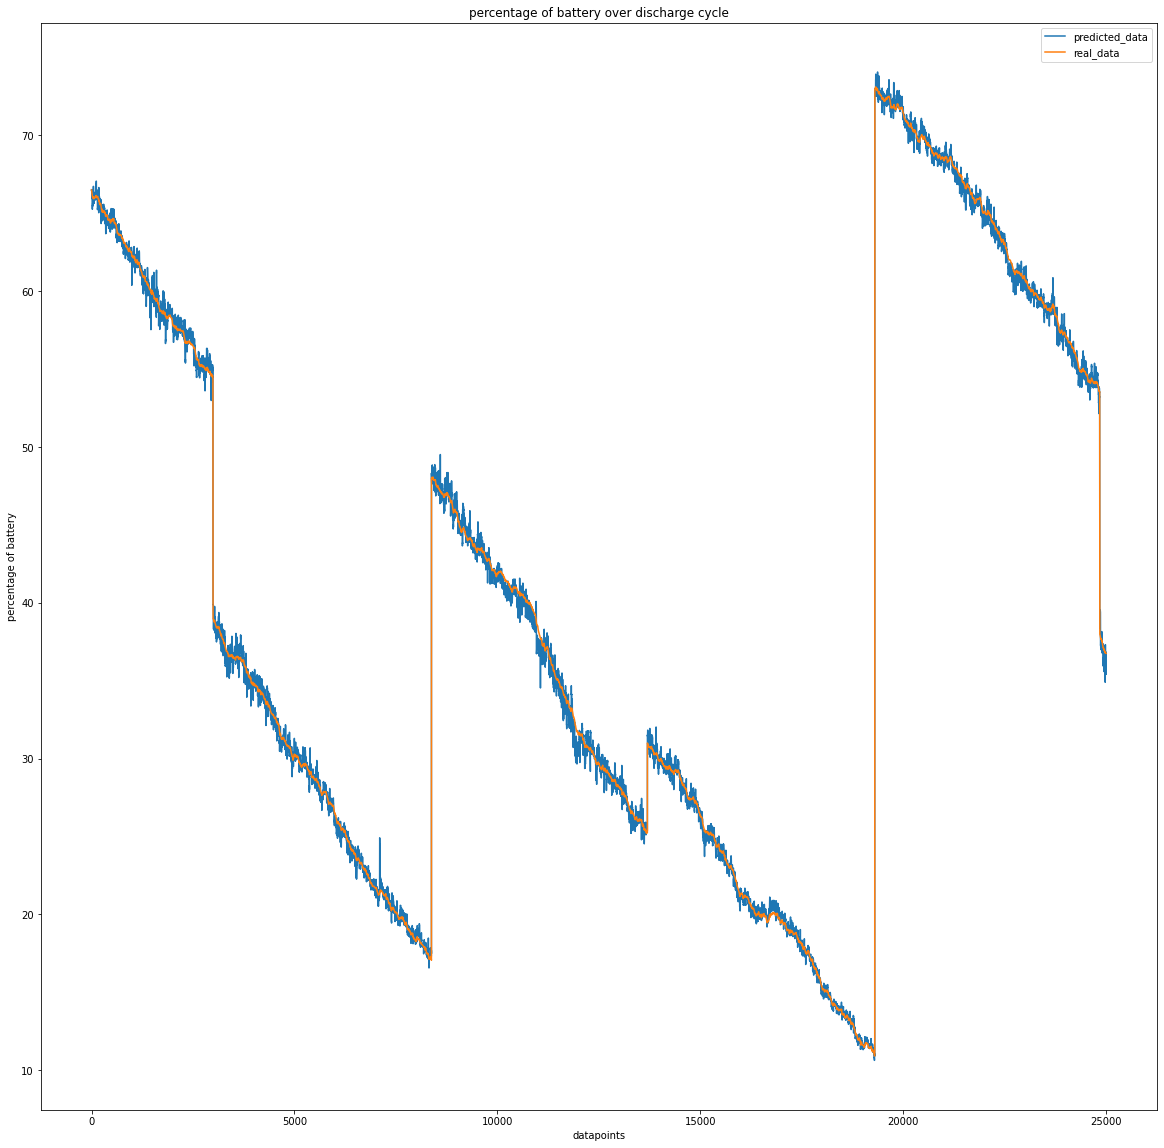

In [826]:
X = np.linspace(0,25000,25000)
plt.figure(figsize=(20,20))
plt.plot(X,y_pred[0:25000], label='predicted_data')
plt.plot(X,y_test[0:25000], label='real_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()

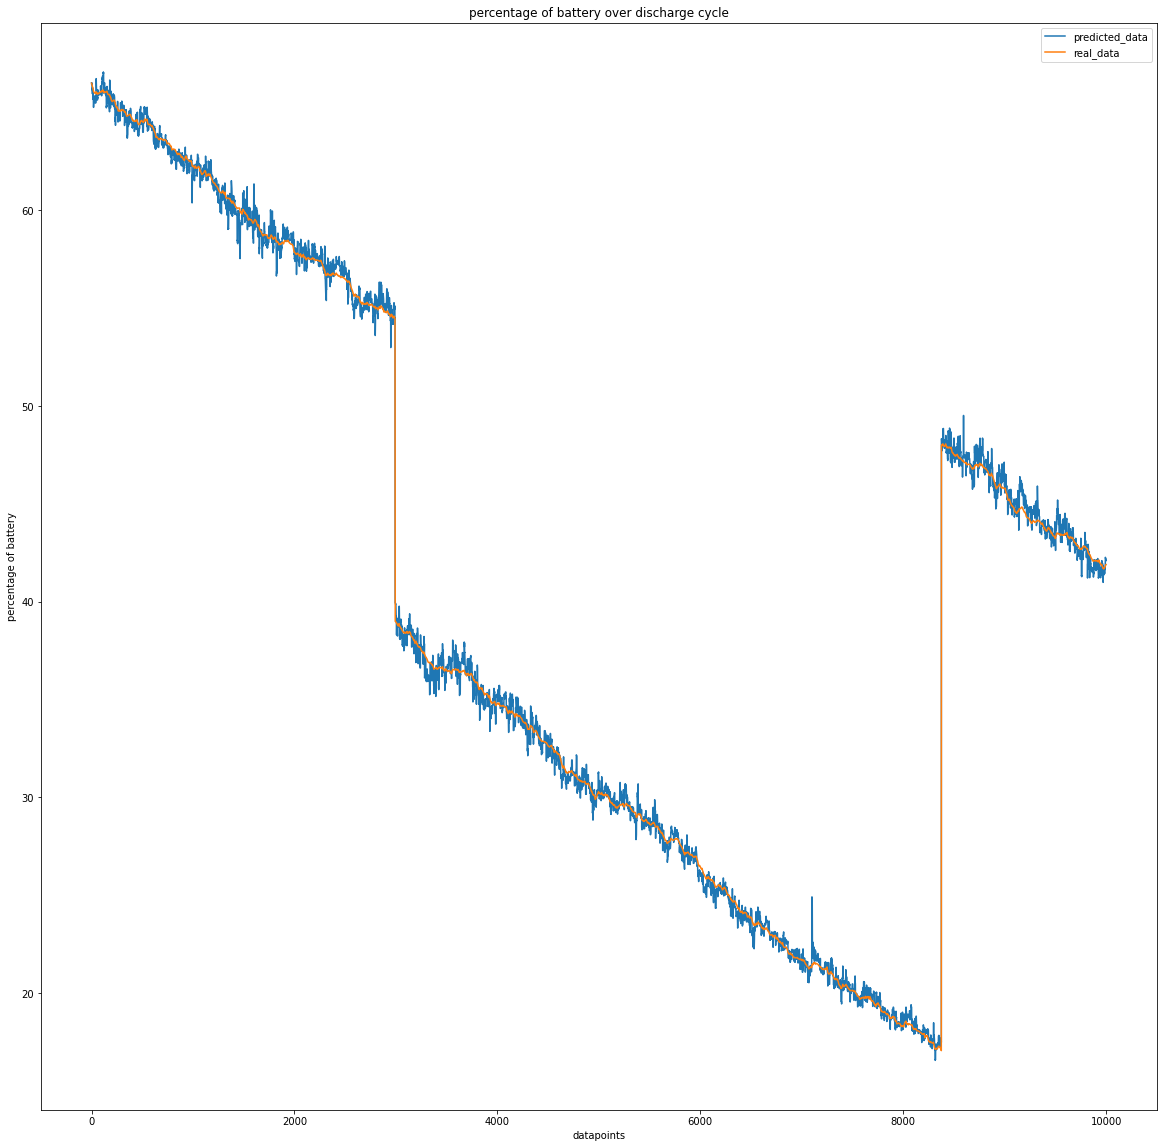

In [824]:
X = np.linspace(0,10000,10000)
plt.figure(figsize=(20,20))
plt.plot(X,y_pred[0:10000], label='predicted_data')
plt.plot(X,y_test[0:10000], label='real_data')
plt.title('percentage of battery over discharge cycle')
plt.xlabel('datapoints')
plt.ylabel('percentage of battery')
plt.legend()
plt.show()